In [ ]:
import pandas as pd

series = pd.Series([5,10,15,20], index = ['a', 'b', 'c', 'd']) #1D
series.shape, series.ndim, series.size
df = pd.DataFrame({"A":[1,2,3,4,5], "B":[6,7,8,9,10]}) #jatti index ni ok
# df.shape
df
df.columns

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Concepts and technology of AI/data.csv')
# df.head() #top 5 datas
df.head(8)
df.tail()#end ko 5 datas

df.columns
df.info()
df.describe()
df.shape
df['x'] #x column matra access gareko

df[['x', 'y']] #list banayera rakhne 1ta vanda badhi column lai access garnu paryo vane
df.isnull().sum()
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris() # Load the Iris dataset
iris_df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']], # Removed extra space in keys 'data' and 'target'
    columns=iris['feature_names'] + ['target'] # Removed extra space after 'target'
)

np.random.seed(42) # Introduce missing values randomly
mask = np.random.rand(*iris_df.shape) < 0.1 # 10%
iris_df[mask] = np.nan
print(" Missing Values in Iris Dataset :")
print(iris_df.isnull().sum())
iris_df_ffill = iris_df.ffill()
iris_df_mean = iris_df.fillna(iris_df.mean())
iris_df_median = iris_df.fillna(iris_df.median())
iris_df_zero = iris_df.fillna(0)

iris_df_expanded = pd.concat([iris_df, iris_df_ffill.add_suffix('_ffill'),
                  iris_df_mean.add_suffix('mean'), iris_df_median.add_suffix('median'),
                  iris_df_zero.add_suffix('zero')], axis = 1)

print("\nDataset after Filling Missing Values:  ")
print(iris_df_expanded.head())
# X_scaled = X-Xmin/Xmax - Xmin

# 0 ra 1 ma aauxa
#One Hot Encoding
import pandas as pd
df_municipalities = pd.DataFrame({'Municipality' : ['Kathmandu', 'Bhaktapur', 'Lalitpur', 'Madhyapur Thimi', 'Kirtipur']})
one_hot_encoding = pd.get_dummies(df_municipalities['Municipality'], prefix = 'Municipality')
df_encoded = pd.concat([df_municipalities, one_hot_encoding], axis=1)
print(df_encoded)

***TO-Do Tasks***

In [8]:
#3.1
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Concepts and technology of AI/bank .csv')
#2a
df.columns.unique()
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
#2a
objCol = df.select_dtypes(include=['object']).columns
print("Columns with dtype=object:")
print(objCol)

#3
numeric_df = df.drop(columns = objCol)
numeric_df.to_csv("banknumericdata.csv")
print("Numeric DataFrame saved as 'banknumericdata.csv'.\n")

#4
numeric_data = pd.read_csv("banknumericdata.csv")
print("Summary stats of banknumericdata.csv:")
print(numeric_data.describe())


Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Numeric DataFrame saved as 'banknumericdata.csv'.

Summary stats of banknumericdata.csv:
         Unnamed: 0           age        balance           day      duration  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean   22605.000000     40.936210    1362.272058     15.806419    258.163080   
std    13051.435847     10.618762    3044.765829      8.322476    257.527812   
min        0.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11302.500000     33.000000      72.000000      8.000000    103.000000   
50%    22605.000000     39.000000     448.000000     16.000000    180.000000   
75%    33907.500000     48.000000    1428.000000     21.000000    319.000000   
max    45210.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         

In [12]:
#problem2
import pandas as pd
df_med = pd.read_csv('/content/drive/MyDrive/Concepts and technology of AI/medical_students_dataset.csv');
df.info()

missingValue = df.isnull().sum()
print(missingValue)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
age          0
job          0
marital      0
education    0
default      0
balance      0
housing  

In [23]:
#problem2 3
for col in missingValue.index:
  if df[col].dtype == "int64":
    df[col].fillna(df[col].mean())  #numeric columns
    print(f"Filled missing values in '{col}' with mean: {df[col].mean()}")

  elif df[col].dtype == "object":
        #categorical columns
        df[col].fillna(df[col].mode()[0])
        print(f"Filled missing values in '{col}' with mode: {df[col].mode()[0]}")

Filled missing values in 'age' with mean: 40.93621021432837
Filled missing values in 'job' with mode: blue-collar
Filled missing values in 'marital' with mode: married
Filled missing values in 'education' with mode: secondary
Filled missing values in 'default' with mode: no
Filled missing values in 'balance' with mean: 1362.2720576850766
Filled missing values in 'housing' with mode: yes
Filled missing values in 'loan' with mode: no
Filled missing values in 'contact' with mode: cellular
Filled missing values in 'day' with mean: 15.80641879188693
Filled missing values in 'month' with mode: may
Filled missing values in 'duration' with mean: 258.1630797814691
Filled missing values in 'campaign' with mean: 2.763840658246887
Filled missing values in 'pdays' with mean: 40.19782796222158
Filled missing values in 'previous' with mean: 0.5803233726305546
Filled missing values in 'poutcome' with mode: unknown
Filled missing values in 'y' with mode: no


In [24]:
#4
dup=df.duplicated().sum()
print(dup)

0


In [31]:
#3.2
#problem1
import pandas as pd
df_Titanic = pd.read_csv('/content/drive/MyDrive/Concepts and technology of AI/Titanic-Dataset.csv')
df_Titanic.info()

subset_df = df_Titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class = subset_df[subset_df['Pclass'] == 1]

mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [32]:
null_age = subset_df['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_age}")

#dropping rows with null values in the 'Age' column
subset_df = subset_df.dropna(subset=['Age'])
print(f"Rows remaining after dropping nulls: {len(subset_df)}")


Number of null values in 'Age': 177
Rows remaining after dropping nulls: 714


In [54]:
#3
print(df_Titanic.columns)
one_hot_encoded = pd.get_dummies(df_Titanic['Embarked'], prefix='Embarked')

df_encoded = pd.concat([df_Titanic, one_hot_encoded], axis=1)
print(df_encoded.columns)


dfDrop = df_Titanic.drop(columns=['Embarked'])
print("\n modified dataframe:\n",dfDrop.head(4))


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

 modified dataframe:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin  
0      0   

Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


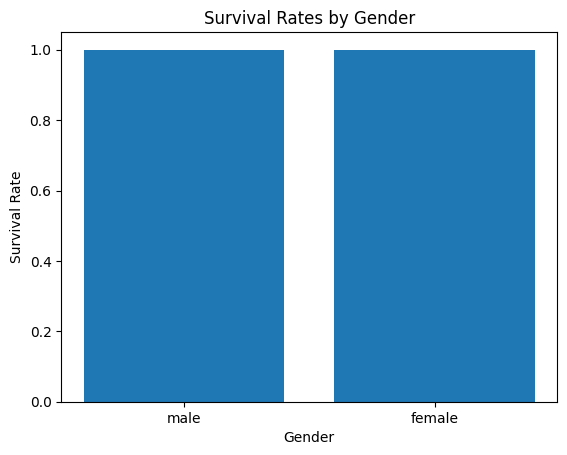

In [76]:
#4
import pandas as pd
import matplotlib.pyplot as plt

df_Titanic = pd.read_csv('/content/drive/MyDrive/Concepts and technology of AI/Titanic-Dataset.csv')
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(mean_survival_by_gender)

plt.bar(x=df_Titanic['Sex'], height=df_Titanic['Survived'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

Mean survival rates by port of embarkation:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


<ipython-input-73-0107f39d5791>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df_Titanic, ci=None)


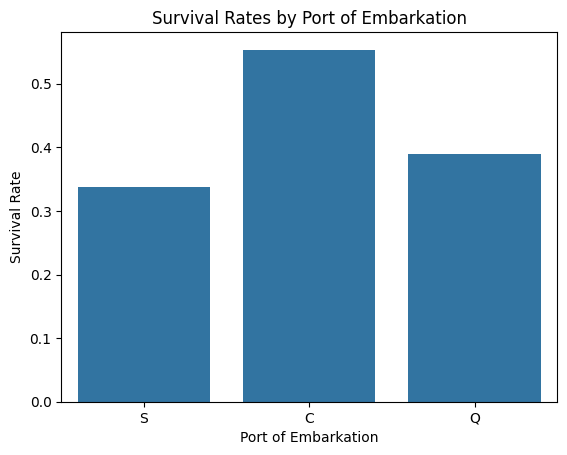

In [73]:
#5
import seaborn as sns
mean_survival_by_port = df.groupby('Embarked')['Survived'].mean()
print("Mean survival rates by port of embarkation:")
print(mean_survival_by_port)

sns.barplot(x='Embarked', y='Survived', data=df_Titanic, ci=None)
plt.title('Survival Rates by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()